In [ ]:
import csv
import pandas as pd
import difflib
import numpy as np
import pickle

#data_dict = csv.DictReader(open("newfood.csv"))

with open('newfood.csv', mode='r') as infile:
    reader = csv.reader(infile)
    with open('newfood_new.csv', mode='w') as outfile:
        writer = csv.writer(outfile)
        data_dict = {rows[0]:rows[1] for rows in reader}

In [ ]:
recipe_data = pd.read_csv('newfood.csv')


In [ ]:
df

,id,title,pricePerServing,weightPerServing,vegetarian,vegan,glutenFree,dairyFree,sustainable,veryHealthy,...,Vitamin D/µg,Vitamin K/µg,Vitamin C/mg,Alcohol/g,Caffeine/g,stars,popularity,userId,tfdbId,recipeId
0,1,Fried Anchovies with Sage,5.6051,226,False,False,False,True,False,False,...,0.29,0.00,0.00,0.0,0.0,3,150.437577,1,1,1915
1,2,Anchovies Appetizer With Breadcrumbs & Scallions,0.8206,33,False,False,False,True,False,False,...,0.00,7.18,0.00,0.0,0.0,1,139.082615,1,2,1916
2,3,"Carrots, Cauliflower And Anchovies",4.3800,364,False,False,False,True,False,True,...,0.00,104.27,32.60,0.0,0.0,4,107.376788,1,3,1918
3,4,Bap Story Stir Fried Anchovies (Myulchi Bokkeum),8.1122,711,False,False,True,True,False,True,...,6.24,16.02,3.88,0.0,0.0,3,112.312950,1,4,1919
4,5,"Bread, Butter And Anchovies",0.2557,36,False,False,False,False,False,False,...,0.00,2.21,0.00,0.0,0.0,5,43.926995,1,5,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1717,1995,Blackened Salmon Fillets,4.4589,209,False,False,True,False,False,False,...,0.43,9.61,1.43,0.0,0.0,3,37.729059,14,1995,1480
1718,1996,Vegetable Stew With Halibut,0.1400,32,False,False,True,False,False,False,...,0.00,2.26,3.47,0.0,0.0,4,18.650748,14,1996,1481
1719,1997,Snapper Tacos with Chipotle Cream,2.8066,333,False,False,False,False,False,False,...,11.79,8.64,17.63,0.0,0.0,3,15.794946,14,1997,1482
1720,1998,Smoky Maple-glazed Salmon Supper,6.8995,474,False,False,True,False,False,True,...,0.00,44.11,34.17,0.0,0.0,4,45.054936,14,1998,1483


User Ratings

In [ ]:
#reads the items (recipes) and user ratings
def getRecipeRatings(idx):
  user_items = [int(s) for s in user_data.loc[idx]['items'].replace('[','').replace(']','').replace(',','').split()]
  user_ratings = [float(s) for s in user_data.loc[idx]['ratings'].replace('[','').replace(']','').replace(',','').split()]
  df = pd.DataFrame(list(zip(user_items,user_ratings)),columns = ['Item','Rating'])
  df.insert(loc=0,column='User',value = user_data.loc[idx].u)
  return df

In [ ]:
#recipe_ratings = pd.DataFrame(columns = ['User','Item','Rating'])
#for idx,row in user_data.iterrows():
#  recipe_ratings = recipe_ratings.append(getRecipeRatings(row['u']),ignore_index=True)

In [ ]:
with open('recipe_ratings.pkl', 'wb') as recipe_ratings:
  pickle.dump(data_dict, recipe_ratings)


In [ ]:
#recipe_ratings.to_pickle('recipe_ratings.pkl')
recipe_ratings = pd.read_pickle('recipe_ratings.pkl')

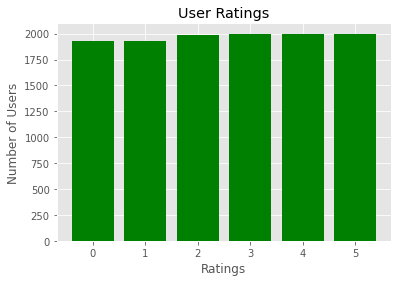

In [ ]:
import matplotlib.pyplot as plt

data = pd.read_csv('newfood.csv')


df = pd.DataFrame(data)

X = list(df.iloc[:, 58])
Y = list(df.iloc[:, 0])

plt.bar(X, Y, color='g')
plt.title("User Ratings")
plt.xlabel("Ratings")
plt.ylabel("Number of Users")

plt.show()

Importing the nltk libraries and downloading the necessary packages

In [108]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

Tokenizing the sentences is the first stage. *(words that are very common but not very important in the text such as conjunctions or prepositions)*


Then lemmatize the sentence *(using nltk pos tagger)*.


In [109]:
words = set(nltk.corpus.words.words())

In [110]:
lemmatizer = WordNetLemmatizer()

def nltk_pos_tagger(nltk_tag):
    if nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    else:          
        return None

def tokenize_sentence(sentence):
    tokenizer = nltk.RegexpTokenizer(r"[^\d\W]+")
    tokenized = tokenizer.tokenize(sentence)
    stopwords = nltk.corpus.stopwords.words('english')
    finalsentence = [word for word in tokenized if word not in stopwords]
    return(finalsentence)

def lemmatize_sentence(sentence):

    nltk_tagged = nltk.pos_tag(sentence)  
    wordnet_tagged = map(lambda x: (x[0], nltk_pos_tagger(x[1])), nltk_tagged)
    lemmatized_sentence = []
    
    for word, tag in wordnet_tagged:
        if not (tag is None):    
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return (lemmatized_sentence)

def tokenize_lemmatize(sentence):
  tokenized = tokenize_sentence(sentence)
  lemmatized = lemmatize_sentence(tokenized)
  selectedwords = [word for word in lemmatized if word in words]
  final = list(dict.fromkeys(selectedwords))
  return(final)